# Sentiment Analysis of Covid-19 Related Tweets based on Geographic Location and State Policies

#### Authors: Steve Diamond [(GitHub)](ttps://github.com/ssdiam2000), Markell Jones-Francis [(GitHub)](https://git.generalassemb.ly/markelljones-francis), and Julia Kelman [(GitHub)](https://git.generalassemb.ly/julia-kelman/)

## Problem Statement

The COVID-19 response has been largely regional and state-based in nature. Some states have enacted strictly enforced stay-at-home policies, while others have provided guidelines. Now, some states are rapidly moving to reopen while others are following scientific guidelines and moving towards reopening very deliberately.   
While data concerning the number of Covid-19 cases and deaths has been reported for each state and analyzed based on the states' policies on social distancing, little information is known about the relationship between those features and individuals' sentiments about the pandemic.  
To get a full picture of the U.S.'s response to the coronavirus,  there is a need to look at the sentiment analysis of social media posts across geographic regions and compare them to both the local policies on social distancing and the occurrences of the pandemic in those areas.  
In order to fill this information gap, we will map the sentiment score based on tweets related to Covid-19 posted between April 28th and May 6th, 2020 accross U.S states.     
In order to gain a deeper understanding of the relationship between sentiment and location, we will compare the sentiment of residents in New York and Texas, two large states on opposite ends of the political spectrum which have acted very differently in terms of the crises.  
More specifically, we will build and interpret a Linear Regression model using Covid-19 occurences and state policy information to predict the sentiment score of NY and Texas residents. 

## Executive Summary

## Table of Contents

- [Loading Data](#Loading-Data)
    - [Library Imports](#Library-Imports)  
    - [Data Imports](#Data-Imports)
    - [Data Dictionary](#Data-Dictionary)
- [Data Cleaning](#Data-Cleaning) 
    - [Missing Values](#Cleaning-Null-Values)
    - [Datatypes](#Cleaning-Datatypes)
- [Exploratory Data Analysis](#EDA)
    - [Feature Engineering](#Feature-Engineering)
    - [User Engagement](#User-Engagement)
- [Mapping](#Mapping)
- [Model Preparation](#Model-Preparation)
- [Modeling](#Modeling)  
    - [Baseline Model](#Baseline-Model)  
    - [Linear Regression](#Linear-Regression)
    - [OLS](#OLS)
- [Model Selection](#Model-Selection)
- [Model Evaluation](#Model-Evaluation)
    - [Coefficients Interpretation](#Coefficients-Interpretation)
- [Conclusion](#Conclusion)
- [References](#References)

## Loading Data 

### Library Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [6]:
pd.set_option('display.max_columns', None)

### Data Imports

In [83]:
df = pd.read_csv('./tweets_covid_and_policy.csv')
df.head()

,screen_name,username,tweet_id,timestamp,text,hashtags,likes,retweets,replies,sentiment_score,city,county_fips,density,date,county,state,county_cases,county_deaths,state_fips,state_cases,state_deaths,county_population,state_population,all_gatherings_prohibited,temporary_hospitals,state_stay_at_home,traveler_quarantines,businesses_reopening,tests_per_thousand,test_positives_rate,shelter_in_place,percent_average_mobility_decrease
0,BillBodouva,Real Estate BuyerRep,1254996305082036224,2020-04-28 04:50:10,Happy Birthday Mom! You wouldn’t believe what...,"['bestmom', 'bestfriend', 'happybirthday', '1s...",0,0,0,0.313973,Sands Point,36059,265.0,2020-04-28 00:00:00,Nassau,New York,35085.0,2039.0,36.0,295137.0,17638.0,1356924.0,19453561.0,1.0,1.0,1.0,0.0,0.0,61.9,0.28,1.0,36.4
1,zagnut99,Frank Zagottis,1254999586302820353,2020-04-28 05:03:12,Isolation dinners continue with Isabel’s roast...,"['Dinner', 'Chicken', 'Isolation', 'IsolationD...",0,0,0,-0.600000,Queens,36000,8247.0,2020-04-28 00:00:00,New York City,New York,162348.0,12067.0,36.0,295137.0,17638.0,8336817.0,19453561.0,1.0,1.0,1.0,0.0,0.0,61.9,0.28,1.0,36.4
2,johnnybebad666_,John Fitzgerald Kennedy Page®,1255004404723462146,2020-04-28 05:22:21,COVID-19 update \nThis MTA BUS didn't pick me ...,[],0,0,0,0.000000,Queens,36000,8247.0,2020-04-28 00:00:00,New York City,New York,162348.0,12067.0,36.0,295137.0,17638.0,8336817.0,19453561.0,1.0,1.0,1.0,0.0,0.0,61.9,0.28,1.0,36.4
3,_offclemmanuelp,Emmanuel Paguntalan,1255105729008226304,2020-04-28 12:04:59,Let's help our Frontliner in fighting COVID-19...,[],0,0,0,0.041667,Queens,36000,8247.0,2020-04-28 00:00:00,New York City,New York,162348.0,12067.0,36.0,295137.0,17638.0,8336817.0,19453561.0,1.0,1.0,1.0,0.0,0.0,61.9,0.28,1.0,36.4
4,HelenAsimegbe,Helen Asimegbe,1255110017453359104,2020-04-28 12:22:01,Reposted from patiencesilias You are an amazin...,['my'],0,0,0,0.358333,Queens,36000,8247.0,2020-04-28 00:00:00,New York City,New York,162348.0,12067.0,36.0,295137.0,17638.0,8336817.0,19453561.0,1.0,1.0,1.0,0.0,0.0,61.9,0.28,1.0,36.4


### Data Dictionary 

|**Feature Name**|**Description**|
|:---|:---|
|all_gatherings_prohibited|Indicator variable - 1 if all gatherings prohibited in county|
|businesses_reopening|Indicator variable - 1 if state has reopened business|
|cases|Number of Covid 19 cases in user's county|
|city|Twtter user's city name|
|county_fips|Standard ID number for user county location|
|county_name|Twtter user county name|
|date||
|deaths|Number of Covid 19 deaths in user's county|
|density|Population density of city|
|hashtags|Hashtags|
|lat|Latitude location of city|
|likes|Number of likes|
|lng|Longitude location of city|
|population|Population of city|
|ranking|?|
|replies|Number of replies|
|retweets|Number of retweets|
|screen_name|Twitter user screen name|
|sentiment_score|Sentiment score from TextBlob|
|shelter_in_place|Indicator variable - 1 if shelter_in_place order in effect for county|
|state_id|Two-digit state ID for user location|
|state_name|Twtter user state location|
|state|Twtter user's state name|
|state_stay_at_home|Indicator variable - 1 if statewide stay-at-home order in place|
|temporary_hospitals|Indicator variable - 1 if state has created temporary hospitals|
|tests_per_thousand|Number of tests per thousand in state conducted by 4/28|
|test_positives_rate|Percent of the tests in state conducted by 4/28 that were positive|
|text|Tweet text|
|traveler_quarantines|Indicator variable - 1 if state has had traveler quarantines|
|tweet_id|Tweet ID number - used to identify tweet information|
|tweet_timestamp|Timestamp of Tweet|
|username|Twitter user username|

## Data Cleaning

Since the tweets' hastags are already included in the `text` feature, we can delete this column. 

In [84]:
df.drop(columns=['hashtags'], inplace=True)

In [85]:
df.shape

(1727, 31)

### Cleaning Null Values

In [86]:
df.isnull().sum()

screen_name                          0
username                             0
tweet_id                             0
timestamp                            0
text                                 0
likes                                0
retweets                             0
replies                              0
sentiment_score                      0
city                                 0
county_fips                          0
density                              0
date                                 0
county                               1
state                                1
county_cases                         1
county_deaths                        1
state_fips                           1
state_cases                          1
state_deaths                         1
county_population                    1
state_population                     1
all_gatherings_prohibited            1
temporary_hospitals                  1
state_stay_at_home                   1
traveler_quarantines     

In [87]:
df[df['county'].isnull()]

,screen_name,username,tweet_id,timestamp,text,likes,retweets,replies,sentiment_score,city,county_fips,density,date,county,state,county_cases,county_deaths,state_fips,state_cases,state_deaths,county_population,state_population,all_gatherings_prohibited,temporary_hospitals,state_stay_at_home,traveler_quarantines,businesses_reopening,tests_per_thousand,test_positives_rate,shelter_in_place,percent_average_mobility_decrease
1675,sandibachom,Sandi Bachom,1256006392349175812,2020-04-30 23:43:54,So good to see my pal @steffikeith I miss my p...,15,0,0,0.62,Muleshoe,48017,571.0,2020-04-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All missing values belong to the same observation. Upon inspection it was discovered that those missing values are due to a conflict when the `tweets_and_county_ny_tx` and `covid_pop_and_policy_tx_ny` dataframes were merged during data gathering (see data gathering notebook). The conflict was due to the fact that Muleshoe is part of Bailey County which did not have any cases of Covid-19 when the tweet was posted on April 30th 2020.   
Since the data concerning Bailey County is available, we will manually enter it at this time based on information from the `covid_pop_and_policy_tx_ny` dataframe for 4/30/20 in TX. 

In [88]:
df.loc[1675,'county'] = 'Bailey'
df.loc[1675,'state'] = 'Texas'
df.loc[1675,'county_cases'] = 0 
df.loc[1675,'county_deaths'] = 0 
df.loc[1675,'state_fips'] = 48
df.loc[1675,'state_cases'] = 29072
df.loc[1675,'state_deaths'] = 828
df.loc[1675,'county_population'] = 7000
df.loc[1675,'state_population'] = 28995881
df.loc[1675,'all_gatherings_prohibited'] = 0
df.loc[1675,'temporary_hospitals'] = 0
df.loc[1675,'state_stay_at_home'] = 0
df.loc[1675,'traveler_quarantines'] = 1
df.loc[1675,'businesses_reopening'] = 1
df.loc[1675,'tests_per_thousand'] = 18.1
df.loc[1675,'test_positives_rate'] = 0.08
df.loc[1675,'shelter_in_place'] = 0
df.loc[1675,'percent_average_mobility_decrease'] = 18.5

In [89]:
df.isnull().sum().sum()

0

There are no more missing values in our dataset. 

### Cleaning Datatypes

In [90]:
df.dtypes

screen_name                           object
username                              object
tweet_id                               int64
timestamp                             object
text                                  object
likes                                  int64
retweets                               int64
replies                                int64
sentiment_score                      float64
city                                  object
county_fips                            int64
density                              float64
date                                  object
county                                object
state                                 object
county_cases                         float64
county_deaths                        float64
state_fips                           float64
state_cases                          float64
state_deaths                         float64
county_population                    float64
state_population                     float64
all_gather

Some of the features' data types are not what they should be. For instance, `date` and `timestamp` should have a type of datetime instead of objects.  
We will therefore write a function to correct the erroneous data types.

In [91]:
def datatype_cleaning(df):
    # Changing timestamp and date to datetime types 
    for col in ['timestamp', 'date']:
        df[col] = pd.to_datetime(df[col])
    # Changing columns to be integer type
    for col in ['county_cases', 'county_deaths', 'state_fips', 'state_cases', 'state_deaths',
                'county_population', 'state_population', 'all_gatherings_prohibited', 'temporary_hospitals',
                'state_stay_at_home', 'traveler_quarantines', 'businesses_reopening', 'shelter_in_place']:
        df[col] = df[col].astype(int)
    return df 

In [92]:
df = datatype_cleaning(df)

In [93]:
df.dtypes

screen_name                                  object
username                                     object
tweet_id                                      int64
timestamp                            datetime64[ns]
text                                         object
likes                                         int64
retweets                                      int64
replies                                       int64
sentiment_score                             float64
city                                         object
county_fips                                   int64
density                                     float64
date                                 datetime64[ns]
county                                       object
state                                        object
county_cases                                  int64
county_deaths                                 int64
state_fips                                    int64
state_cases                                   int64
state_deaths

In order for a feature to be included in a model, it must contain numeric data.  
As a result, we need to modify our `state` feature into an `is_nys` feature where a value of `1` signifies that the tweet was posted by someone in NY State and `0` meaning that the tweet was posted by someone in Texas.   

In [95]:
df.rename(columns={'state':'is_nys'}, inplace=True)
df['is_nys'] = df['is_nys'].map({'New York':1, 'Texas':0})
df.head()

,screen_name,username,tweet_id,timestamp,text,likes,retweets,replies,sentiment_score,city,county_fips,density,date,county,is_nys,county_cases,county_deaths,state_fips,state_cases,state_deaths,county_population,state_population,all_gatherings_prohibited,temporary_hospitals,state_stay_at_home,traveler_quarantines,businesses_reopening,tests_per_thousand,test_positives_rate,shelter_in_place,percent_average_mobility_decrease,tweet_length
0,BillBodouva,Real Estate BuyerRep,1254996305082036224,2020-04-28 04:50:10,Happy Birthday Mom! You wouldn’t believe what...,0,0,0,0.313973,Sands Point,36059,265.0,2020-04-28,Nassau,1,35085,2039,36,295137,17638,1356924,19453561,1,1,1,0,0,61.9,0.28,1,36.4,264
1,zagnut99,Frank Zagottis,1254999586302820353,2020-04-28 05:03:12,Isolation dinners continue with Isabel’s roast...,0,0,0,-0.600000,Queens,36000,8247.0,2020-04-28,New York City,1,162348,12067,36,295137,17638,8336817,19453561,1,1,1,0,0,61.9,0.28,1,36.4,274
2,johnnybebad666_,John Fitzgerald Kennedy Page®,1255004404723462146,2020-04-28 05:22:21,COVID-19 update \nThis MTA BUS didn't pick me ...,0,0,0,0.000000,Queens,36000,8247.0,2020-04-28,New York City,1,162348,12067,36,295137,17638,8336817,19453561,1,1,1,0,0,61.9,0.28,1,36.4,208
3,_offclemmanuelp,Emmanuel Paguntalan,1255105729008226304,2020-04-28 12:04:59,Let's help our Frontliner in fighting COVID-19...,0,0,0,0.041667,Queens,36000,8247.0,2020-04-28,New York City,1,162348,12067,36,295137,17638,8336817,19453561,1,1,1,0,0,61.9,0.28,1,36.4,240
4,HelenAsimegbe,Helen Asimegbe,1255110017453359104,2020-04-28 12:22:01,Reposted from patiencesilias You are an amazin...,0,0,0,0.358333,Queens,36000,8247.0,2020-04-28,New York City,1,162348,12067,36,295137,17638,8336817,19453561,1,1,1,0,0,61.9,0.28,1,36.4,278


In [97]:
df.columns

Index(['screen_name', 'username', 'tweet_id', 'timestamp', 'text', 'likes',
       'retweets', 'replies', 'sentiment_score', 'city', 'county_fips',
       'density', 'date', 'county', 'is_nys', 'county_cases', 'county_deaths',
       'state_fips', 'state_cases', 'state_deaths', 'county_population',
       'state_population', 'all_gatherings_prohibited', 'temporary_hospitals',
       'state_stay_at_home', 'traveler_quarantines', 'businesses_reopening',
       'tests_per_thousand', 'test_positives_rate', 'shelter_in_place',
       'percent_average_mobility_decrease', 'tweet_length'],
      dtype='object')

In [124]:
df['replies'].unique()

array([ 0,  1,  2,  3,  4, 15, 13, 10, 39])

## EDA

### Feature Engineering

In [94]:
df['tweet_length'] = [len(tweet) for tweet in df['text']]

In [106]:
df.describe()

,tweet_id,likes,retweets,replies,sentiment_score,county_fips,density,is_nys,county_cases,county_deaths,state_fips,state_cases,state_deaths,county_population,state_population,all_gatherings_prohibited,temporary_hospitals,state_stay_at_home,traveler_quarantines,businesses_reopening,tests_per_thousand,test_positives_rate,shelter_in_place,percent_average_mobility_decrease,tweet_length
count,1.727000e+03,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1.727000e+03,1.727000e+03,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000,1727.000000
mean,1.256496e+18,0.834395,0.205559,0.108280,0.113676,39013.839027,15809.987261,0.753909,115395.475970,8608.506659,38.953098,241970.345686,14464.993052,6.155987e+06,2.180184e+07,0.753909,0.753909,0.753909,0.246091,0.246091,51.121193,0.230782,0.753909,31.994962,236.475391
std,8.239315e+14,6.967839,1.195304,1.117322,0.256718,5261.772928,12092.553797,0.430857,77783.310522,6022.123817,5.170287,120872.964117,7835.023535,3.146004e+06,4.111378e+06,0.430857,0.430857,0.430857,0.430857,0.430857,18.871547,0.086171,0.430857,7.712345,54.714633
min,1.254996e+18,0.000000,0.000000,0.000000,-1.000000,36000.000000,77.000000,0.000000,0.000000,0.000000,36.000000,26865.000000,738.000000,7.000000e+03,1.945356e+07,0.000000,0.000000,0.000000,0.000000,0.000000,18.100000,0.080000,0.000000,18.500000,38.000000
25%,1.255700e+18,0.000000,0.000000,0.000000,0.000000,36000.000000,1524.000000,1.000000,6708.000000,129.000000,36.000000,295137.000000,17638.000000,2.635516e+06,1.945356e+07,1.000000,1.000000,1.000000,0.000000,0.000000,61.900000,0.280000,1.000000,36.400000,202.500000
50%,1.256564e+18,0.000000,0.000000,0.000000,0.000000,36000.000000,14606.000000,1.000000,167489.000000,12514.000000,36.000000,308345.000000,18610.000000,8.336817e+06,1.945356e+07,1.000000,1.000000,1.000000,0.000000,0.000000,61.900000,0.280000,1.000000,36.400000,265.000000
75%,1.257310e+18,0.000000,0.000000,0.000000,0.246834,36119.000000,27799.000000,1.000000,174341.000000,13064.000000,36.000000,316446.000000,19189.000000,8.336817e+06,1.945356e+07,1.000000,1.000000,1.000000,0.000000,0.000000,61.900000,0.280000,1.000000,36.400000,276.000000
max,1.257890e+18,244.000000,30.000000,39.000000,1.000000,48491.000000,27799.000000,1.000000,183770.000000,18993.000000,48.000000,329405.000000,25956.000000,8.336817e+06,2.899588e+07,1.000000,1.000000,1.000000,1.000000,1.000000,61.900000,0.280000,1.000000,36.400000,433.000000


### User Engagement

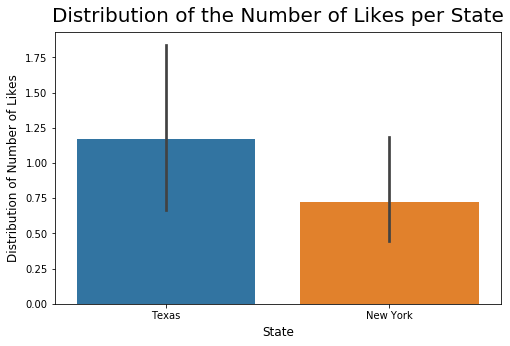

In [121]:
# Visualizing the distribution of number of likes for each state 
plt.figure(figsize=(8,5))
plt.title("Distribution of the Number of Likes per State", fontsize = 20, pad = 10)
sns.barplot(x = df['is_nys'], y = df['likes'])
plt.xlabel("State", fontsize = 12, labelpad = 5)
plt.ylabel("Distribution of Number of Likes", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Texas', 'New York']);

**Interpretation:** While users from Texas tend to receive more likes on their tweets, there does not seem to be a real difference between user engagement (measured by likes on a tweet) between TX and NY.  

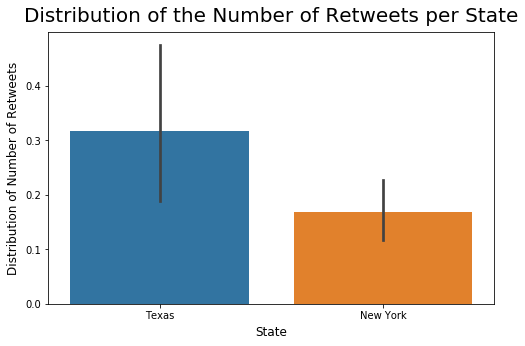

In [123]:
# Visualizing the distribution of number of retweets for each state 
plt.figure(figsize=(8,5))
plt.title("Distribution of the Number of Retweets per State", fontsize = 20, pad = 10)
sns.barplot(x = df['is_nys'], y = df['retweets'])
plt.xlabel("State", fontsize = 12, labelpad = 5)
plt.ylabel("Distribution of Number of Retweets", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Texas', 'New York']);

**Interpretation:** While users from Texas tend to have their tweets retweeted slightly more on average, there does not seem to be a real difference between user engagement (measured by number of retweets) between TX and NY.  

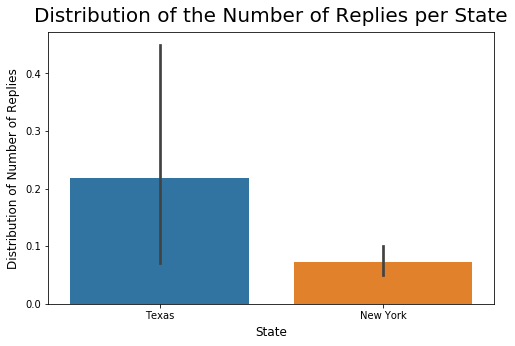

In [125]:
# Visualizing the distribution of number of replies for each state 
plt.figure(figsize=(8,5))
plt.title("Distribution of the Number of Replies per State", fontsize = 20, pad = 10)
sns.barplot(x = df['is_nys'], y = df['replies'])
plt.xlabel("State", fontsize = 12, labelpad = 5)
plt.ylabel("Distribution of Number of Replies", fontsize = 12, labelpad = 5)
plt.xticks(ticks=[0, 1], labels=['Texas', 'New York']);

**Interpretation:** While users from Texas tend to receive more replies on their tweets, there does not seem to be a real difference between user engagement (measured by replies on a tweet) between TX and NY.  

## Mapping

## Model Preparation

## Modeling

### Baseline Model

### Linear Regression

### OLS

## Model Selection

## Model Evaluation

### Coefficients Interpretation

## Conclusion

## References